In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Data\insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### We need to encode categorical features in order to check their correlations with dependent variable. We will use the Label Encoding technique.

Note: We can also use One Hot Encoding technique for "Region" feature. We will consider this situation while model tunning process.

Sex | Female= 0, Male= 1

Smoker | No=0, Yes= 1

Region | Northeast= 0, Nortwest= 1, Southeast= 2, Southwest= 3

In [5]:
attributes = ['age', 'bmi', 'children',  'charges']

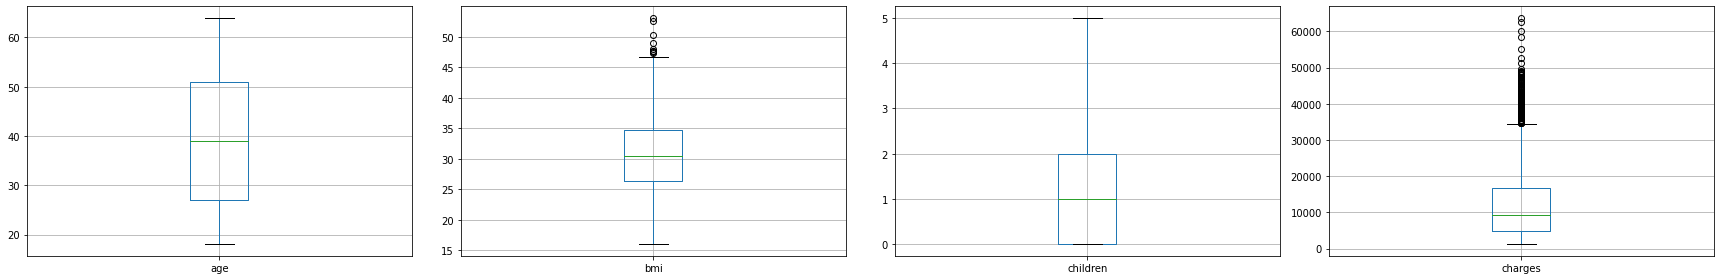

In [6]:
fg, ax = plt.subplots(1,4,figsize=(24,4))

# for i, el in enumerate(list(df.columns.values)):
for col, i in zip(attributes, range (len(df[attributes]))):
    a = df.boxplot(col, ax=ax.flatten()[i])
plt.tight_layout() 

In [7]:
def show_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    outliers_df = df.loc[(df[col] < fence_low) | (df[col] > fence_high)]
    return print('Numbers of outliers in {}'.format(col),len(outliers_df))

In [8]:
for i in attributes:
    show_outliers(df, i)
    print("_"*40)

Numbers of outliers in age 0
________________________________________
Numbers of outliers in bmi 9
________________________________________
Numbers of outliers in children 0
________________________________________
Numbers of outliers in charges 139
________________________________________


In [9]:
for i in df[attributes]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

In [10]:
for i in attributes:
    show_outliers(df, i)
    print("_"*40)

Numbers of outliers in age 0
________________________________________
Numbers of outliers in bmi 0
________________________________________
Numbers of outliers in children 0
________________________________________
Numbers of outliers in charges 0
________________________________________


In [11]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

Insights:

Viewing at the age column, information looks agent of the genuine age conveyance of the grown-up population,exceptionally few individuals have more than 2 children. 75% of the individuals have 2 or fewer children The charge is highly skewed as most individuals would require essential medicare and as it were few endure from maladies which fetched more to induce freed of.

# EDA

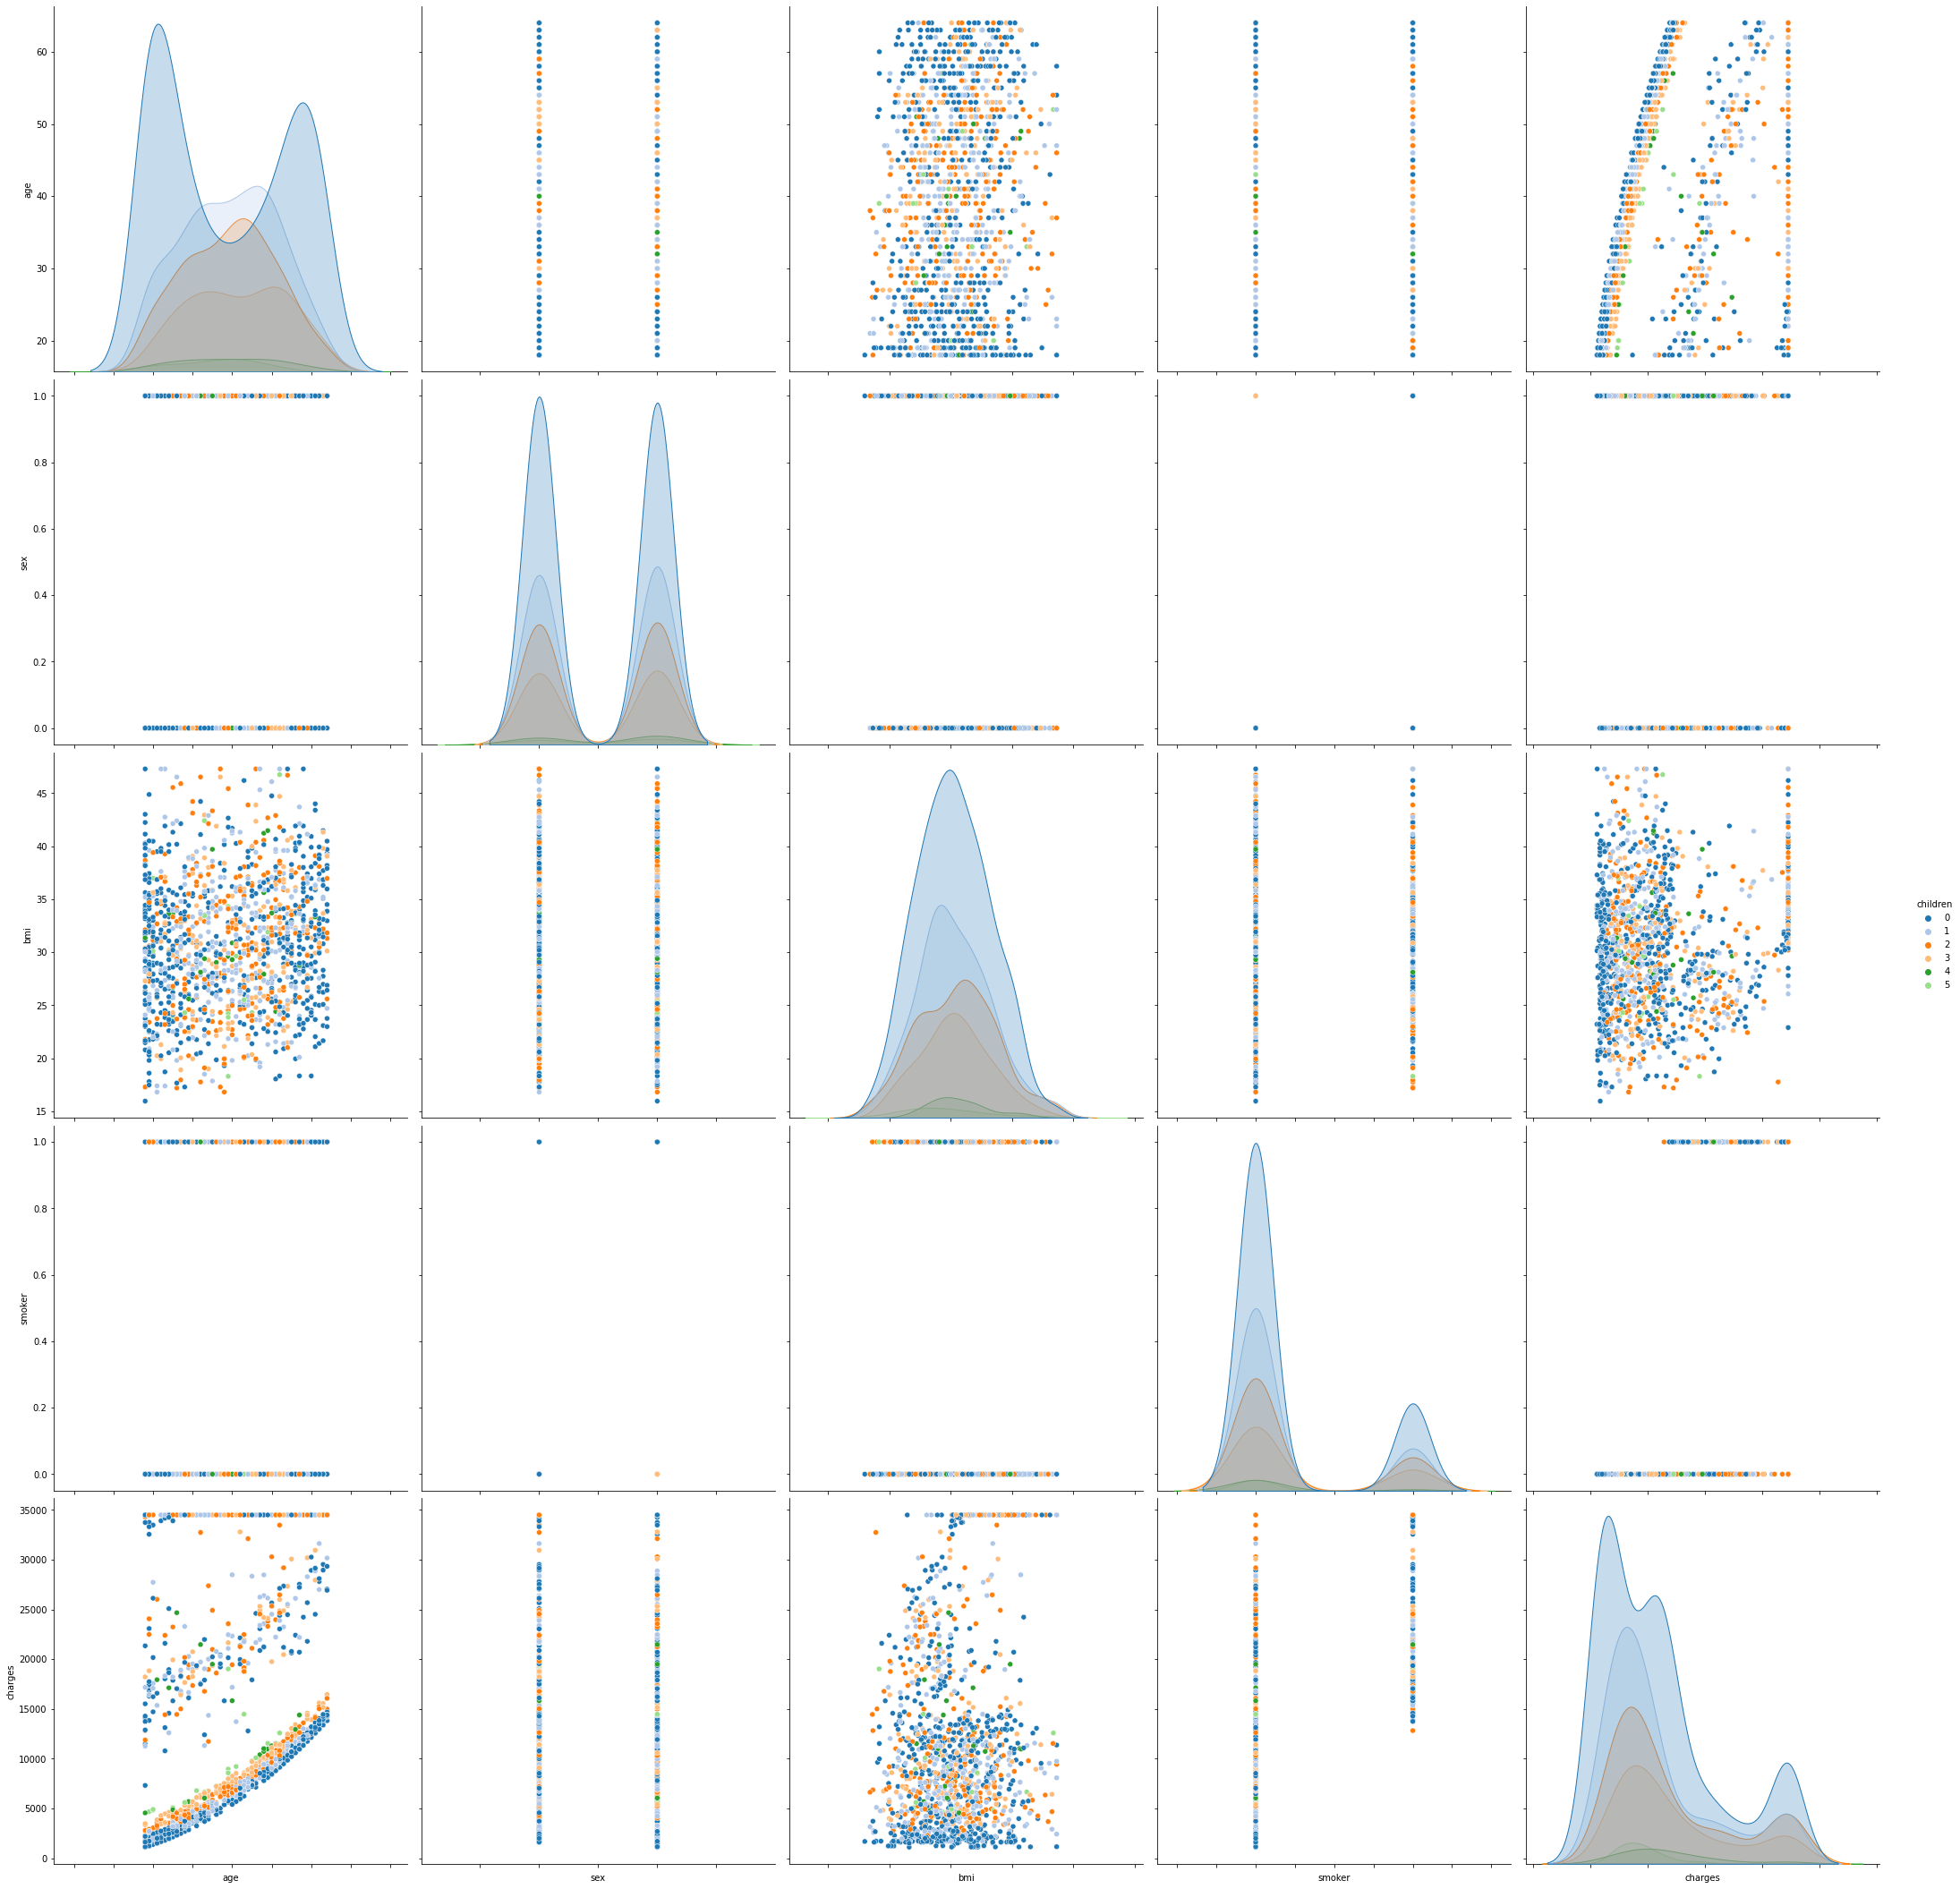

In [37]:
# with sns.plotting_context("notebook",font_scale=2.5):
g = sns.pairplot(df[['age','sex','bmi','children','smoker','charges']], 
                hue='children', palette='tab20',height=6)
g.set(xticklabels=[])

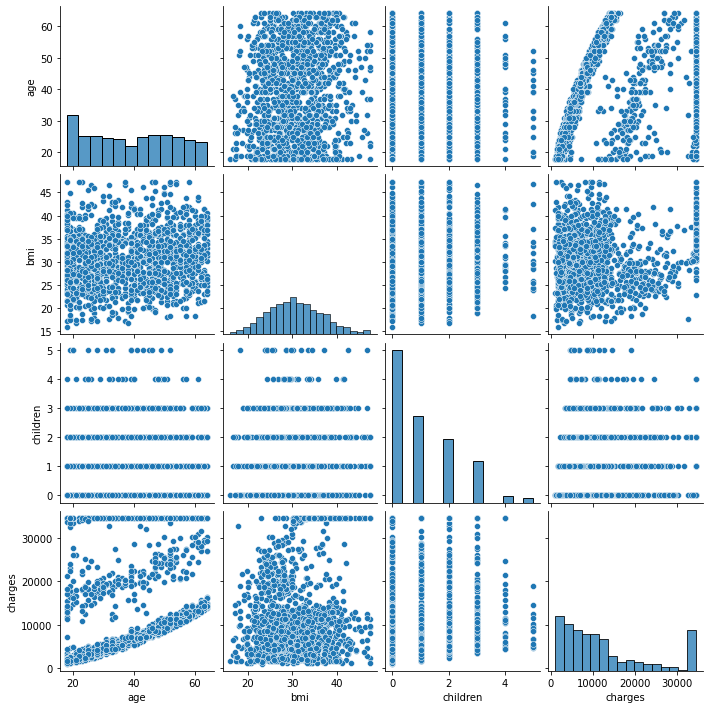

In [12]:
sns.pairplot(df)

<AxesSubplot:>

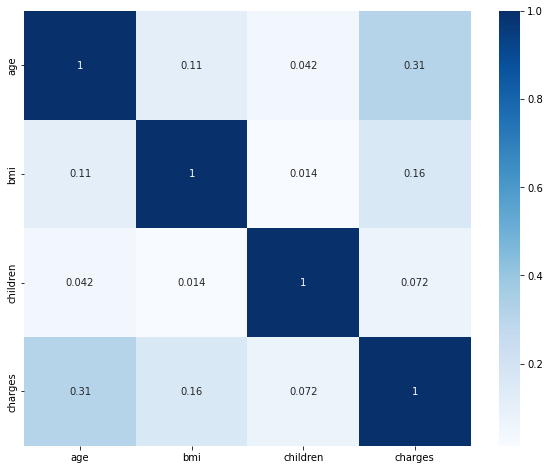

In [13]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), cmap=sns.color_palette("Blues", as_cmap=True), annot=True)

<AxesSubplot:xlabel='region', ylabel='count'>

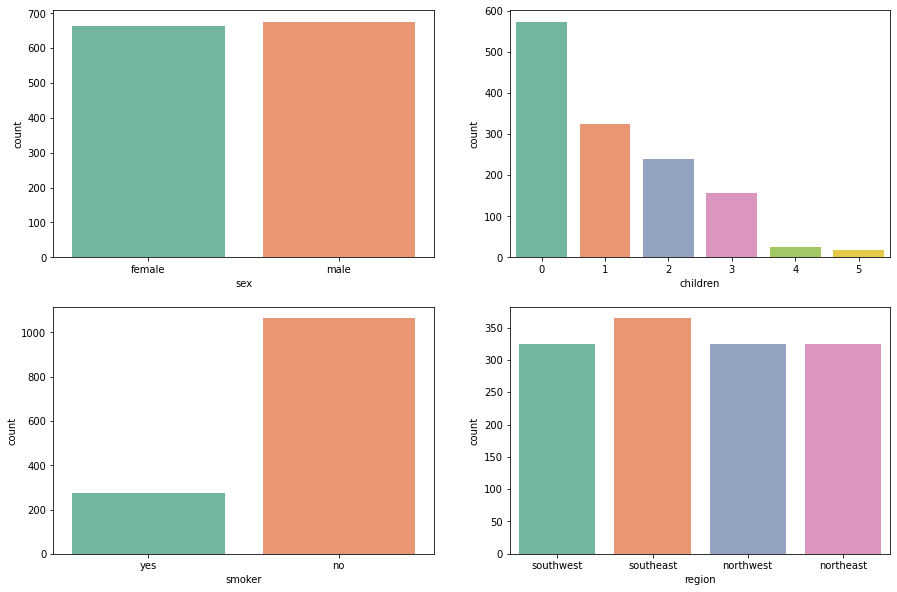

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.countplot(data = df, x = 'sex', palette='Set2' )

plt.subplot(2,2,2)
sns.countplot( data = df, x = 'children', palette='Set2')

plt.subplot(2,2,3)
sns.countplot(data = df, x = 'smoker', palette='Set2')

plt.subplot(2,2,4)
sns.countplot(data = df, x = 'region', palette='Set2')

# Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [16]:
le = LabelEncoder()

#age
df.sex = le.fit_transform(df.sex)
#smoker
df.smoker = le.fit_transform(df.smoker)
#region
df.region = le.fit_transform(df.region)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
y= df["charges"] #dependent variables
X= df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] #independent variables

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y=ax+b --> a: độ dốc(coefficient) ; b: intercept

In [21]:
LnR = LinearRegression()
LnR.fit(X_train, y_train)

LinearRegression()

In [22]:
from time import time

In [23]:
t0 = time()

In [24]:
print("Coefficient: {}".format(LnR.coef_.reshape(-1,1)))
print("Intercept: {}".format(LnR.intercept_))

print("Training time: {} seconds.".format(round(time()-t0, 3)))

Coefficient: [[3215.01199667]
 [ -89.59054875]
 [1330.43274447]
 [ 517.87485532]
 [7936.6627651 ]
 [-219.70563296]]
Intercept: 12402.165588169153
Training time: 0.142 seconds.


In [25]:
y_pred = LnR.predict(X_test)

In [26]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
900,8688.858850,8566.876054
1064,5708.867000,5965.929363
1256,11436.738150,13341.007129
298,34489.350562,27805.504543
237,4463.205100,8393.541756
...,...,...
662,5148.552600,7265.102844
1103,11363.283200,13209.802518
1333,10600.548300,11743.382363
332,13429.035400,13194.169449


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

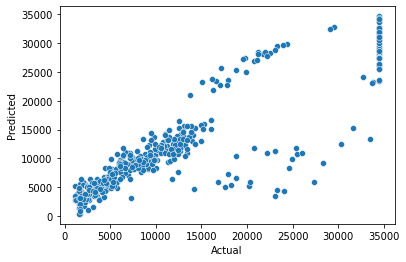

In [27]:
sns.scatterplot(x=results.Actual, y=results.Predicted)

C:\Users\defaultuser0.LAPTOP-POTNR7PE\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


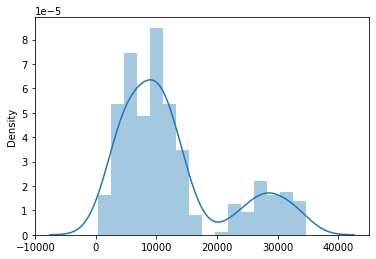

In [28]:
sns.distplot((y_pred));

In [29]:
from sklearn import metrics

In [30]:
# Calculate regression performance metrics
# r-squared score - the closer to 1 the better
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2: ", metrics.r2_score(y_test, y_pred), "\n")
print("Score: ", LnR.score(X_test, y_test))
print("Score: ", LnR.score(X_train, y_train))

MAE:  3162.1026756157935
MSE:  24189517.288430624
RMSE:  4918.283978018209
R2:  0.7770614686849568 

Score:  0.7770614686849568
Score:  0.7329941434635947


In [31]:
from sklearn.model_selection import KFold, cross_val_score

In [32]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(LnR, X, y, cv = k_folds)

print("Average CV Score: ", scores.mean()*100)

Average CV Score:  74.40239765084186


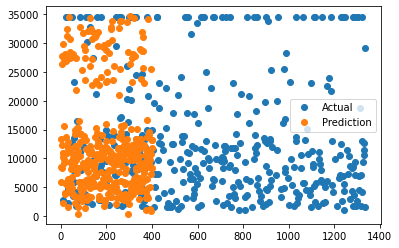

In [33]:
plt.plot(y_test, 'o', label='Actual')
plt.plot(y_pred, 'o', label='Prediction')
plt.legend()
plt.show()